In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("salesprofit.csv", encoding='ISO-8859-1')

# View basic info
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values
print(df.duplicated().sum())  # Check duplicates

(9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 1

In [3]:
# Remove duplicates
df = df.drop_duplicates()

# Fill missing values
df['Sales'] = df['Sales'].fillna(df['Sales'].median())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())
df['Discount'] = df['Discount'].fillna(df['Discount'].median())

# Convert 'Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

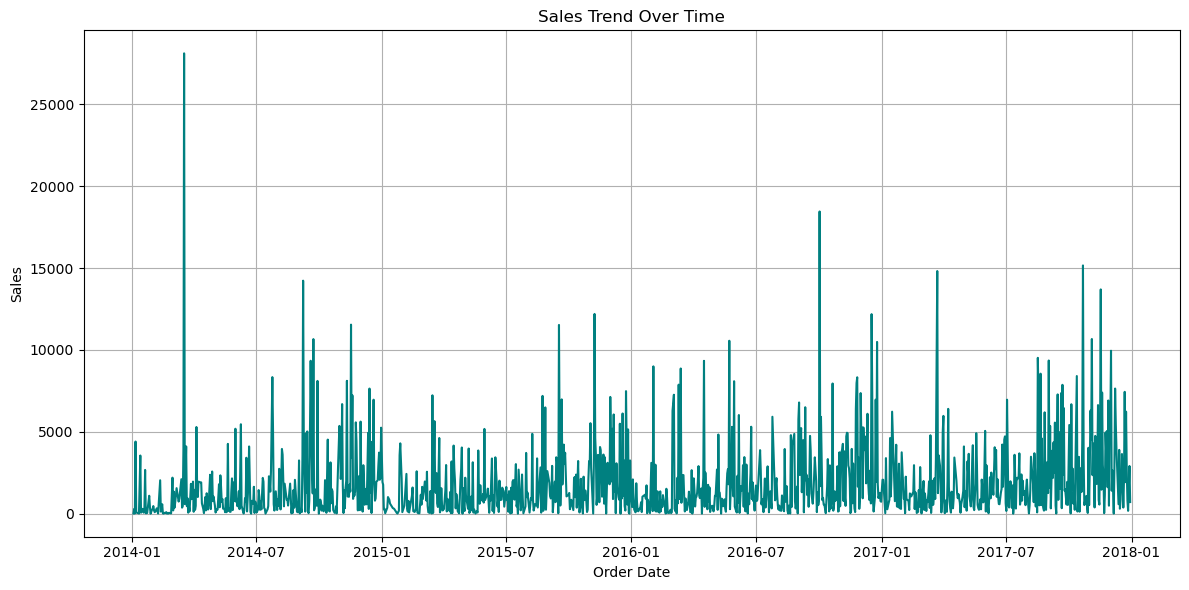

In [4]:
import matplotlib.pyplot as plt

sales_over_time = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'], color='teal')
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

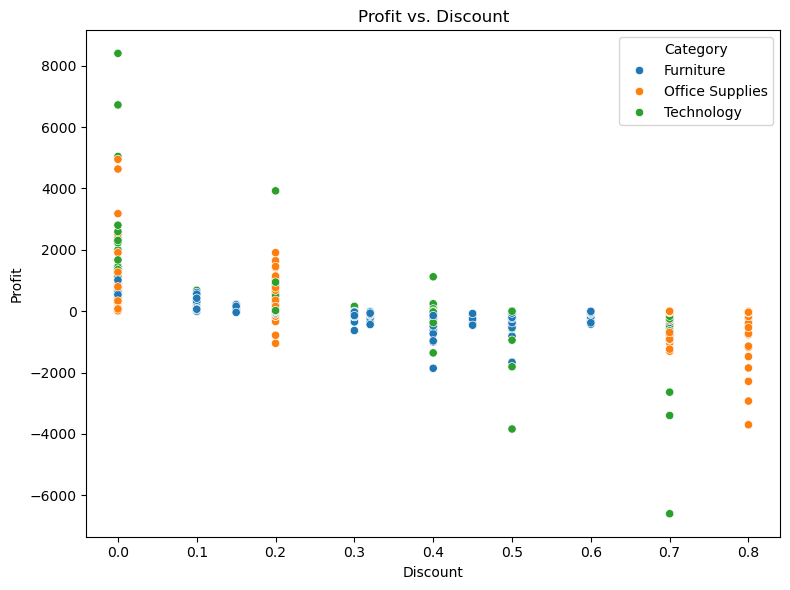

In [5]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs. Discount")
plt.tight_layout()
plt.show()

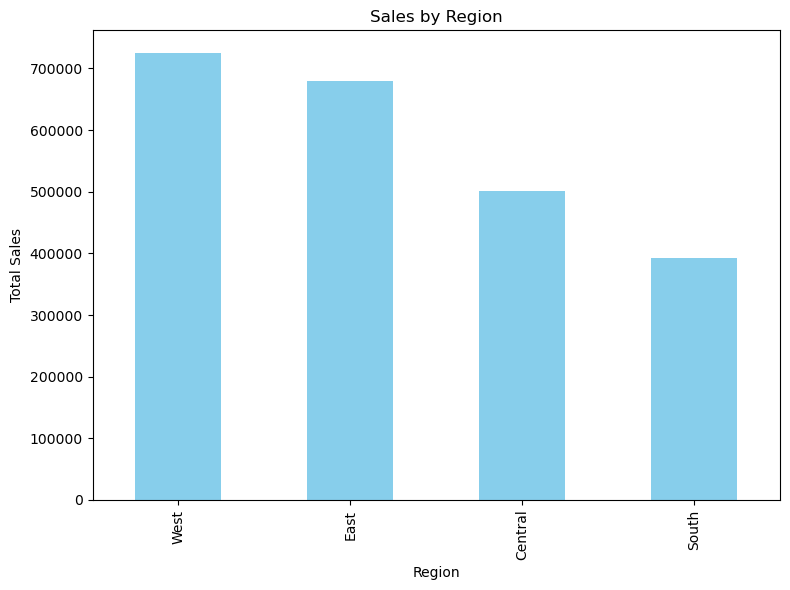

In [6]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

sales_region.plot(kind='bar', color='skyblue', figsize=(8,6), title='Sales by Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


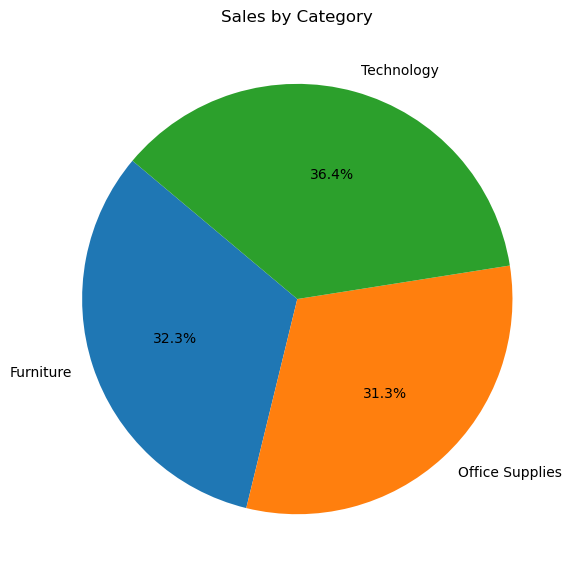

In [7]:
sales_category = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(sales_category, labels=sales_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales by Category")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
# Feature variables
X = df[['Profit', 'Discount']]

# Target variable
y = df['Sales']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² Score: -0.1855
Mean Squared Error (MSE): 700271.89
